# Aprendizado de Máquina - 2021.2
  * Prof. Ana Luiza Bessa de Paula Barros
  * Programa de Pós-graduação em Ciência da Computacão - PPGCC/UECE
## Atividade 2  PCA (Principal Component Analysis)
  * Domingos Bruno Sousa Santos

## PCA x LDA

In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
plt.style.use('seaborn')

In [2]:
data_df = pd.read_csv("winequality-red.csv", delimiter=';')
data_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# Removendo os rotulos
X_data = data_df.iloc[:, 0: 11]
Y_data = data_df["quality"].values

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_data)

lda = LinearDiscriminantAnalysis(n_components=2, solver='svd')
X_lda = lda.fit_transform(X_data, Y_data)


/home/bruno/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/bruno/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 720x360 with 0 Axes>

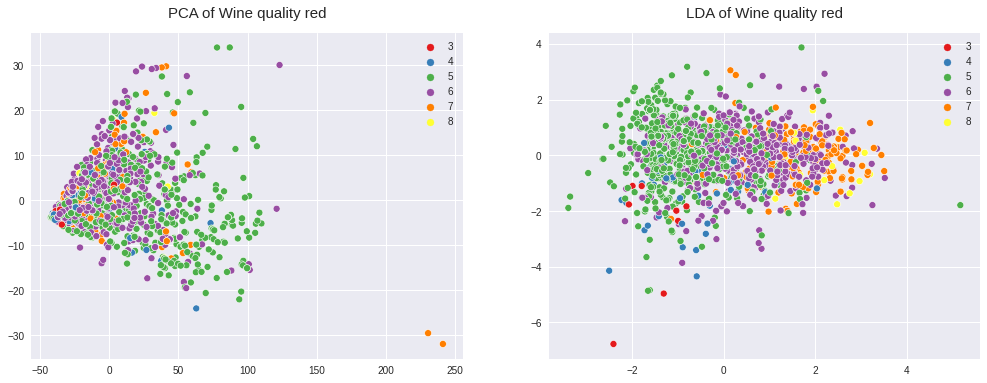

In [12]:
plt.figure(figsize=(10, 5))
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17 ,6))
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=Y_data, palette='Set1', ax=ax[0])
sns.scatterplot(X_lda[:,0], X_lda[:,1], hue=Y_data, palette='Set1', ax=ax[1])
ax[0].set_title("PCA of Wine quality red", fontsize=15, pad=15)
ax[1].set_title("LDA of Wine quality red", fontsize=15, pad=15)
plt.savefig('PCA vs LDA.png', dpi=80)